In [57]:
import script
from func.color import color

val_especifico = {'Ano': '2014',
                  'Pacote': 'PC',
                  'Local Arquivos': 'd:/Users/marcio.melo/Documents/Script_Validação_RDE/ScriptValidacao/RDE/Arquivos/PC/2014'}

#Valores de exceção
val_excec = ['#NULO', '-1', '#NE', '-3', '#NULO#', '#NE#']

resultado = script.rodar(val_especifico, val_excec)

# Relatório de Testes


## Arquivos RDE Legado
### Resultado das Eleições 2022 [SMG]

#### Versão 0.6

---

### Histórico de Versões

#### 0.6 _[24/10/2022] - Márcio Ribeiro de Melo (marcio.melo@tse.jus.br)_
1. Inclusão de testes de conteúdo do arquivo (arquivos vazios).

#### 0.5 _[24/05/2022] - Diogo M. Neiva (diogo.neiva@tse.jus.br)_
1. Inclusão de testes de conteúdo do arquivo (arquivos vazios).

#### 0.4 _[09/02/2022] - Diogo M. Neiva (diogo.neiva@tse.jus.br)_
1. Inclusão de testes do pacote de prestação de contas

#### 0.3.1 _[13/01/2021] - Diogo M. Neiva (diogo.neiva@tse.jus.br)_
1. Correção de bug na verificação da ordem do cabeçalho;
2. Tratamento de exceções em pacotes com arquivos não esperados.

#### 0.3 _[10/01/2021] - Diogo M. Neiva (diogo.neiva@tse.jus.br)_
1. Testes de pacote de arquivos de Resultado das Eleições 2002;
2. Registro de dados de resumo dos arquivos.

#### 0.2 _[17/11/2021] - Diogo M. Neiva (diogo.neiva@tse.jus.br)_
1. Organização da arquitetura prevendo reuso;
2. Novas Verificações:
    - Arquivos do Lote;
    - Ordem do Cabeçalho;
    - Valores Classificatórios;
3. Adoção de índice para avaliação de campos de exceção
4. Capacidade de avaliar todos arquivos do lote;
5. Resumo do relatório conciso;
6. Geração de um arquivo .csv com resultado da verificação.

#### 0.1 _[11/10/2021] - Diogo M. Neiva (diogo.neiva@tse.jus.br)_
1. Versão inicial do Relatório - Prova de Conceito.


#### Backlog

1. Teste de campos classificatórios tipo B;
2. Teste de campos classificatórios combinados;
3. Teste de dados de candidatos, fornecedores e doadores;
4. Teste de sumarização.

---


### 1. Introdução
Este relatório contém a descrição dos aspectos relativos aos testes executados que visam obter a qualidade dos arquivos gerados para publicação no Repositório de Dados Eleitoral (RDE). 



### 2. Objetivos
A execução dos testes visam atingir os seguintes objetivos:

#### 2.1 Objetivo Geral
Garantir qualidade de dados e meta-dados para que os arquivos sejam publicados.

#### 2.2 Objetivos Específicos

1. Aderência às Leis de Dados Abertos;
2. Aderência aos 8 princípios dos Dados Abertos;
3. Aderência à Lei de Acesso à Informação;
4. Coerência entre a descrição do LEIA-ME e os arquivos gerados.


### 3. Escopo

1. Avaliação dos arquivos de prestação de contas de candidatos dos 26 estados mais o Distrito Federal;
2. Os testes visam avaliar padrões de dados, cabeçalhos, formato de arquivo, formato de dados, conteúdo dos arquivos e integridade de dados (este último ainda em desenvolvimento).


### 4. Estratégia
Para aferiação de qualidade dos dados é utilizada a técnica de **Teste Exploratório** com auxílio de scripts automatizados em python.

### 5. Ambiente

#### Hardware
<blockquote>    
Processador	Intel(R) Core(TM) i7-3770 CPU @ 3.40GHz   3.90 GHz<br>    
RAM instalada	16,0 GB<br>
Tipo de sistema	Sistema operacional de 64 bits, processador baseado em x64
</blockquote>

#### Sistema Operacional
<blockquote>
Edição	Windows 10 Pro<br>    
Versão	20H2<br> 
Compilação do SO	19042.631
</blockquote>

#### Jupyter Notebook
<blockquote>
The version of the notebook server is: 6.3.0<br>    
Python 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
</blockquote>



### 6. Critérios de Aceitação

1. Totalidade dos arquivos esperados para o lote;
2. Arquivo LEIA-ME;
3. Nome dos arquivos conforme LEIA-ME;
4. Formato do arquivo LATIN-1;
5. Cabeçalhos do arquivo conforme LEIA-ME;
6. Formato de campos de data [DD/MM/AAAA];
7. Formato de campos de hora [HH:MM:SS];
8. Formato de campos de valores com decimal separado por vírgula;
9. Ausência de campos vazios;
10. Uso dos valores #NULO, #NE, -1 E -3 conforme LEIA-ME.

In [58]:
#Tratamento dos registros dos testes para geração de relatórios

import pandas as pd

#configuração de parâmetro de impressão dos quadros
pd.options.display.max_colwidth = None
pd.options.display.max_rows = None

result_ver_NOK = resultado.teste[resultado.teste['Resultado'] == 'NOK']

### 7. Resumo da execução dos testes
Abaixo, resumo da execução do script de testes.

In [59]:
from datetime import datetime
nomeArq = val_especifico['Pacote'] + val_especifico['Ano'] + datetime.today().strftime('_%Y%m%d_%H%M') + ".csv"


resultado.teste.to_csv('../Relatorios/Relatório_' + nomeArq, encoding='Latin-1')
resultado.resumo.to_csv('../Relatorios/Resumo_' + nomeArq, encoding='Latin-1')

print('Arquivo de resultado de teste gerado com sucesso!')
print(nomeArq)

Arquivo de resultado de teste gerado com sucesso!
PC2014_20221021_1738.csv


### 8. Resultado dos testes
As informações apresentadas a seguir são saídas dos algoritmos de teste dos arquivos e apresentam apenas as não conformidades encontradas.

#### 8.1 Resumo do Resultado dos Testes
Abaixo, resumo para os testes realizados.

In [60]:
#Cálculo da cobertura de testes
result_ver_NOK = resultado.teste[resultado.teste['Resultado'] == 'NOK']

densidade = ((len(resultado.teste[resultado.teste['Resultado'] == 'NOK']) / len(resultado.teste))*100)

print(color.BOLD + 'Quantidade de testes realizados: {:,}'.format(len(resultado.teste)))
print('Densidade de defeitos: %.2f' %densidade + '%'+ color.END)


Quantidade de testes realizados: 245
Densidade de defeitos: 99.59%


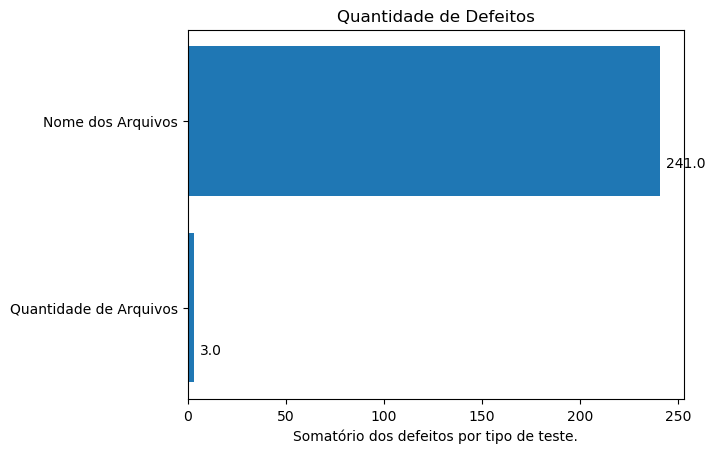

In [61]:
import matplotlib.pyplot as plt
import numpy as np

try:

    graf = resultado.teste.pivot_table(values='Coluna', index='Teste', columns='Resultado', aggfunc='count')\
                                  .reset_index().fillna(0).sort_values('NOK', ascending=False)

    plt.rcdefaults()
    fig, ax = plt.subplots()

    ax.barh(graf['Teste'], graf['NOK'], align='center')
    # ax.set_yticks(graf['NOK'])
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Somatório dos defeitos por tipo de teste.')
    ax.set_title('Quantidade de Defeitos')

    for i, v in enumerate(graf['NOK']):
        ax.text(v +3, i +0.25, str(v),
                color = 'black')

    plt.show()

except KeyError:
    print(color.BOLD + 'Não foram encontrados defeitos.'+ color.END)

#### 8.2 Detalhamento das não conformidades

##### 8.2.1 Quantidade de Arquivos no Lote
Este valor é calculado a partir do tipo de lote de arquivos e tipo de eleição.

In [62]:
result_ver_NOK_temp = result_ver_NOK[result_ver_NOK['Teste'] == 'Quantidade de Arquivos'].groupby(['Teste'])[['Valor Esperado', 'Valor Obtido', 'Arquivo']].sum().reset_index()

if result_ver_NOK_temp.empty:
    print('Não foram encontrados defeitos.')
    
result_ver_NOK_temp

,Teste,Valor Esperado,Valor Obtido,Arquivo
0,Quantidade de Arquivos,242,1,d:/Users/marcio.melo/Documents/Script_Validação_RDE/ScriptValidacao/RDE/Arquivos/PC/2014d:/Users/marcio.melo/Documents/Script_Validação_RDE/ScriptValidacao/RDE/Arquivos/PC/2014Candidatosd:/Users/marcio.melo/Documents/Script_Validação_RDE/ScriptValidacao/RDE/Arquivos/PC/2014Órgãos Partidários


##### 8.2.2 Arquivos esperados no pacote
Arquivos listados abaixo não foram encontrados no pacote.

In [63]:
result_ver_NOK_temp = result_ver_NOK[(result_ver_NOK['Teste'] == 'Nome dos Arquivos') &
                                     (result_ver_NOK['Valor Obtido'] == 'Não encontrado')].groupby(['Valor Obtido', 'Tipo'])['UF'].apply(list).reset_index()

if result_ver_NOK_temp.empty:
    print('Não foram encontrados defeitos.')
    
result_ver_NOK_temp

,Valor Obtido,Tipo,UF
0,Não encontrado,despesas-contratadas-candidatos,[leiame]
1,Não encontrado,despesas-contratadas-orgaos-partidarios,[leiame]
2,Não encontrado,despesas-pagas-candidatos,[leiame]
3,Não encontrado,despesas-pagas-orgaos-partidarios,[leiame]
4,Não encontrado,despesas_contratadas_candidatos,"[BA, CE, MA, RO, SC, MT, MG, PB, AP, AC, ES, AL, SE, TO, SP, PI, BR, RS, GO, DF, BRASIL, MS, RN, PE, RJ, AM, PA, PR, RR]"
5,Não encontrado,despesas_contratadas_orgaos_partidarios,"[CE, BRASIL, MS, RN, AP, RS, BA, RO, PA, AL, RJ, MG, ES, GO, PI, BR, AM, TO, MT, MA, SC, SP, PE, DF, RR, SE, PB, PR, AC]"
6,Não encontrado,despesas_pagas_candidatos,"[AM, BR, PA, AP, GO, RS, RR, ES, BRASIL, CE, PB, MT, TO, MS, AL, DF, MA, RN, MG, PE, SP, RO, AC, PR, PI, SC, RJ, SE, BA]"
7,Não encontrado,despesas_pagas_orgaos_partidarios,"[AP, RN, MA, AC, RO, RS, PE, AM, AL, ES, SC, PI, SP, TO, SE, BRASIL, GO, RJ, BR, BA, MG, MT, PR, CE, RR, PB, DF, PA, MS]"
8,Não encontrado,receitas-candidatos,[leiame]
9,Não encontrado,receitas-candidatos-doador-originario,[leiame]


##### 8.2.3 Arquivos não esperados no pacote
Arquivos listados abaixo não fazem parte do pacote.

In [64]:
result_ver_NOK_temp = result_ver_NOK[(result_ver_NOK['Teste'] == 'Nome dos Arquivos') & (result_ver_NOK['Valor Obtido'] != 'Não encontrado')].groupby(['Valor Obtido'])['Valor Esperado'].apply(list).reset_index()

if result_ver_NOK_temp.empty:
    print('Não foram encontrados defeitos.')
    
result_ver_NOK_temp

Não foram encontrados defeitos.


,Valor Obtido,Valor Esperado


##### 8.2.4 Conteúdo do Arquivo
Os arquivos abaixo apresentaram inconformidades quanto ao conteúdo do arquivo (vazio).

In [65]:
result_ver_NOK_temp = result_ver_NOK[result_ver_NOK['Teste'] == 'Conteúdo do Arquivo'].groupby(['Coluna','Tipo']).agg({'Valor Esperado': 'first','Valor Obtido': list,'UF': list}).reset_index()

if result_ver_NOK_temp.empty:
    print('Não foram encontrados defeitos.')
    
result_ver_NOK_temp

Não foram encontrados defeitos.


,Coluna,Tipo,Valor Esperado,Valor Obtido,UF


##### 8.2.5 Codificação do Arquivo
Arquivos listados abaixo estão com codificação de caracteres inválida.

In [66]:
result_ver_NOK_temp = result_ver_NOK[result_ver_NOK['Teste'] == 'Codificação dos Arquivos'].groupby(['Valor Obtido', 'Tipo'])['UF'].apply(list).reset_index()

if result_ver_NOK_temp.empty:
    print('Não foram encontrados defeitos.')
    
result_ver_NOK_temp

Não foram encontrados defeitos.


,index,UF


##### 8.2.6 Ordem do cabeçalho
Colunas fora de ordem para os arquivos de cada Tipo e UF.

In [67]:
result_ver_NOK_temp = result_ver_NOK[result_ver_NOK['Teste'] == 'Ordem do Cabeçalho'].groupby(['Valor Esperado', 'Valor Obtido', 'Tipo'])['UF'].apply(list).reset_index()


if result_ver_NOK_temp.empty:
    print('Não foram encontrados defeitos.')
    
result_ver_NOK_temp


Não foram encontrados defeitos.


,index,UF


##### 8.2.7 Colunas sobressalentes no arquivo
Colunas presente nos arquivos .csv e não declaradas no Leia-me.

In [68]:
result_ver_NOK_temp = result_ver_NOK[result_ver_NOK['Teste'] == 'Cabeçalho do Arquivo'].groupby(['Valor Obtido', 'Tipo'])['UF'].apply(list).reset_index()

if result_ver_NOK_temp.empty:
    print('Não foram encontrados defeitos.')
    
result_ver_NOK_temp


Não foram encontrados defeitos.


,index,UF


##### 8.2.8 Formato de Datas
As colunas abaixo apresentaram inconformidades nos arquivos de cada Tipo e UF.

In [69]:
result_ver_NOK_temp = result_ver_NOK[result_ver_NOK['Teste'] == 'Formato de Data'].groupby(['Coluna','Tipo']).agg({'Valor Obtido': list,
                                                                                                                   'UF':list}).reset_index()
if result_ver_NOK_temp.empty:
    print('Não foram encontrados defeitos.')
    
result_ver_NOK_temp

Não foram encontrados defeitos.


,index,Valor Obtido,UF


##### 8.2.9 Formato de Hora
As colunas abaixo apresentaram inconformidades nos arquivos de cada Tipo e UF.

In [70]:
result_ver_NOK_temp = result_ver_NOK[result_ver_NOK['Teste'] == 'Formato de Hora'].groupby(['Coluna','Valor Obtido', 'Tipo'])['UF'].apply(list).reset_index()

if result_ver_NOK_temp.empty:
    print('Não foram encontrados defeitos.')
    
result_ver_NOK_temp

Não foram encontrados defeitos.


,index,UF


##### 8.2.10 Formato de Números
As colunas abaixo apresentaram inconformidades nos arquivos de cada Tipo e UF.

In [71]:
result_ver_NOK_temp = result_ver_NOK[result_ver_NOK['Teste'] == 'Formato de Número'].groupby(['Coluna','Valor Obtido', 'Tipo'])['UF'].apply(list).reset_index()

if result_ver_NOK_temp.empty:
    print('Não foram encontrados defeitos.')
    
result_ver_NOK_temp

Não foram encontrados defeitos.


,index,UF


##### 8.2.11 Células Vazias
As colunas abaixo apresentaram inconformidades nos arquivos de cada Tipo e UF. Os valores estão expressos em unidades.

In [72]:
result_ver_NOK_temp = result_ver_NOK[result_ver_NOK['Teste'] == 'Célula Vazia'].groupby(['Coluna','Tipo']).agg({'Valor Obtido': list,
                                                                                                                   'UF':list}).reset_index()
if result_ver_NOK_temp.empty:
    print('Não foram encontrados defeitos.')
    
result_ver_NOK_temp

Não foram encontrados defeitos.


,index,Valor Obtido,UF


##### 8.2.12 Valores Classificatórios
As colunas abaixo apresentaram inconformidades nos arquivos de cada Tipo e UF.

In [73]:
result_ver_NOK_temp = result_ver_NOK[result_ver_NOK['Teste'] == 'Valor Classificatório'].groupby(['Coluna','Tipo', 'Valor Obtido']).agg({'Valor Esperado': 'first','UF': list}).reset_index()

if result_ver_NOK_temp.empty:
    print('Não foram encontrados defeitos.')
    
result_ver_NOK_temp

Não foram encontrados defeitos.


,Coluna,Tipo,Valor Obtido,Valor Esperado,UF


##### 8.2.13 Valores de Exceção #NULO
As colunas abaixo apresentaram inconformidades nos arquivos de cada Tipo e UF.

In [74]:
result_ver_NOK_temp = result_ver_NOK[result_ver_NOK['Teste'] == 'Valor de Exceção #NULO'].groupby(['Coluna','Tipo']).agg({'Valor Esperado': 'first','Valor Obtido': list,'UF': list}).reset_index()

if result_ver_NOK_temp.empty:
    print('Não foram encontrados defeitos.')
    
result_ver_NOK_temp

Não foram encontrados defeitos.


,Coluna,Tipo,Valor Esperado,Valor Obtido,UF


##### 8.2.14 Valores de Exceção -1
As colunas abaixo apresentaram inconformidades nos arquivos de cada Tipo e UF.

In [75]:
result_ver_NOK_temp = result_ver_NOK[result_ver_NOK['Teste'] == 'Valor de Exceção -1'].groupby(['Coluna','Tipo']).agg({'Valor Esperado': 'first','Valor Obtido': list,'UF': list}).reset_index()

if result_ver_NOK_temp.empty:
    print('Não foram encontrados defeitos.')
    
result_ver_NOK_temp

Não foram encontrados defeitos.


,Coluna,Tipo,Valor Esperado,Valor Obtido,UF


##### 8.2.15 Valores de Exceção #NE
As colunas abaixo apresentaram inconformidades nos arquivos de cada Tipo e UF.

In [76]:
result_ver_NOK_temp = result_ver_NOK[result_ver_NOK['Teste'] == 'Valor de Exceção #NE'].groupby(['Coluna','Tipo']).agg({'Valor Esperado': 'first','Valor Obtido': list,'UF': list}).reset_index()

if result_ver_NOK_temp.empty:
    print('Não foram encontrados defeitos.')
    
result_ver_NOK_temp

Não foram encontrados defeitos.


,Coluna,Tipo,Valor Esperado,Valor Obtido,UF


##### 8.2.16 Valores de Exceção -3
As colunas abaixo apresentaram inconformidades nos arquivos de cada Tipo e UF.

In [77]:
result_ver_NOK_temp = result_ver_NOK[result_ver_NOK['Teste'] == 'Valor de Exceção -3'].groupby(['Coluna','Tipo']).agg({'Valor Esperado': 'first','Valor Obtido': list,'UF': list}).reset_index()

if result_ver_NOK_temp.empty:
    print('Não foram encontrados defeitos.')
    
result_ver_NOK_temp

Não foram encontrados defeitos.


,Coluna,Tipo,Valor Esperado,Valor Obtido,UF


##### 8.2.17 Valores de Exceção \#NULO#.
As colunas abaixo apresentaram inconformidades nos arquivos de cada Tipo e UF.

In [78]:
result_ver_NOK_temp = result_ver_NOK[result_ver_NOK['Teste'] == 'Valor de Exceção #NULO#'].groupby(['Coluna','Tipo']).agg({'Valor Esperado': 'first','Valor Obtido': list,'UF': list}).reset_index()

if result_ver_NOK_temp.empty:
    print('Não foram encontrados defeitos.')
    
result_ver_NOK_temp

Não foram encontrados defeitos.


,Coluna,Tipo,Valor Esperado,Valor Obtido,UF


##### 8.2.18 Valores de Exceção \#NE#.
As colunas abaixo apresentaram inconformidades nos arquivos de cada Tipo e UF.

In [79]:
result_ver_NOK_temp = result_ver_NOK[result_ver_NOK['Teste'] == 'Valor de Exceção #NE#'].groupby(['Coluna','Tipo']).agg({'Valor Esperado': 'first','Valor Obtido': list,'UF': list}).reset_index()

if result_ver_NOK_temp.empty:
    print('Não foram encontrados defeitos.')
    
result_ver_NOK_temp

Não foram encontrados defeitos.


,Coluna,Tipo,Valor Esperado,Valor Obtido,UF


In [80]:
from datetime import datetime
print(color.BOLD + '\n\n\nTESTE CONCLUÍDO EM:' + color.END, datetime.today().strftime('%d/%m/%Y às %H:%M'))




TESTE CONCLUÍDO EM: 21/10/2022 às 17:38
